# <center> <font>Non Linear Optimization</font>
## <center>Optimzing a real dataset: Unemployment Rate in Brazil (MAR/2012 - FEB/2018)
### <center>**MODULE:**<br>
<center>Tópicos Especiais em Processamento de sinais: Fusão e modelamento de sinais (ELE-405)<br>
### <center>**Student:**<br>
<center>Carlos Felipe Emygdio de Melo - 00300848
### <center>Lecturers:<br>
<center>Diego Eckhard
<center>Valner João Brusamarello<br><br><br><br><br>
<br><br><br><br><br>
<center>**Federal University of Rio Grande do Sul-UFRGS-PPGEE**
<center>**Porto Alegre/RS - Brazil**
<center>**26/04/2018**

# <center>Linearization<br>
> ## In this first section we will find the equation that best fit in the dataset distribuition. After we find the equation, we will use to methods to optimize this function and find the value of _x_ that returns the minimum value of _f(x)_ <br>



>To find the coefficients of the equation that best describe the dataset, it will be used the follow equation:<br>
<center>**estimator**<br>
<center>$\mathbf{\tilde{\theta} = (\phi^{T}\phi)^{-1}\phi^{T}Y}$<br>
**where:**<br>
$\mathbf{\tilde{\theta} \rightarrow} $ it is the vector of coefficients that we need to find;<br>
$\mathbf{\phi \rightarrow} $ it is the matrix of the functions that accompany the coeeficients in our future equation;<br>
$\mathbf{Y \rightarrow}$ it is the entry values from the dataset;

In [1]:
# cell for imports used through all the code
import numpy as np
import math as m
import matplotlib.pyplot as plt
from scipy.misc import derivative
from numpy.linalg import inv
from scipy.optimize import minimize
from scipy.optimize import minimize_scalar
import pandas as pd

### <center>a few informations about this dataset:<br>
 - **14 years old or older individuals, unemployed at the month of the reference.
 - Frequency: Monthly from 2012.03 until 2018.02
 - Source: Instituto Brasileiro de Geografia e Estatística, Pesquisa Nacional por Amostra de Domicílios Contínua (IBGE/PNAD Contínua)
 - Unit:Person(Thousands)
 - Update at: 17/04/2018**

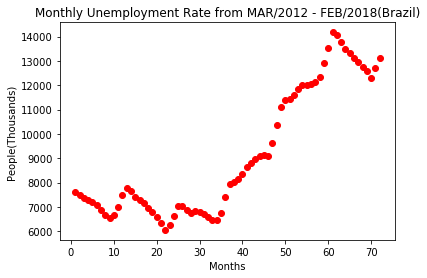

In [4]:
#importing Data Set
df = pd.read_csv("Taxa_desemprego_1.csv",delimiter=';')
input_Data = np.array(df.iloc[:,2:].values)
entry_x = np.arange(1,input_Data.size+1)
plt.plot(entry_x,input_Data,'ro')
plt.ylabel('People(Thousands)')
plt.xlabel('Months')
plt.title("Monthly Unemployment Rate from MAR/2012 - FEB/2018(Brazil)")
plt.show()

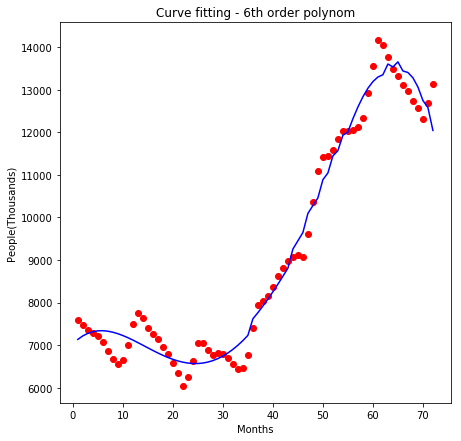

In [5]:
#creates phi
def phi(x):
    z = np.array([np.power(x,6),np.power(x,5),np.power(x,4),np.power(x,3),np.power(x,2),np.power(x,1),np.power(x,0)])
    return z
#creates Rô
ro = np.zeros(7).T
#Creates the data array
data = np.zeros(entry_x.size).T
#creates the capital phi(phizao), which is the vector of phi vectors(which means that capital phi(phizao) is a matrix)
phizao = np.zeros([entry_x.size,ro.size])
#input the data in the data array and the capital phi matrix
for i in xrange(entry_x.size):
    data[i] = input_Data[i] 
    phizao[i] = phi(entry_x[i])

#computing the coefficients ro
inverse = inv(phizao.T.dot(phizao))
ro = inverse.dot(np.transpose(phizao).dot(data))

data2 = np.zeros(entry_x.size).T
data2 = phizao.dot(ro)
plt.figure(figsize=(7,7))
plt.plot(entry_x,data, 'ro',entry_x,data2,'b-')
plt.ylabel('People(Thousands)')
plt.xlabel('Months')
plt.title("Curve fitting - 6th order polynom")
plt.show()

# <center>Gradient Method

### Method used to find local or global(it can't garantee that the value found is the global value) minimum value of a function<br>
<center>$\mathbf{X_{k+1} = X_{k} - \gamma_{k}\triangledown J(X_{k})}$<br>

> **obs: In this file we'll implement the bisection method**

**************Gradient Method********************

Current Function Value: 6567.37574852
 Iterations: 40
 minimum: 24.5147844828



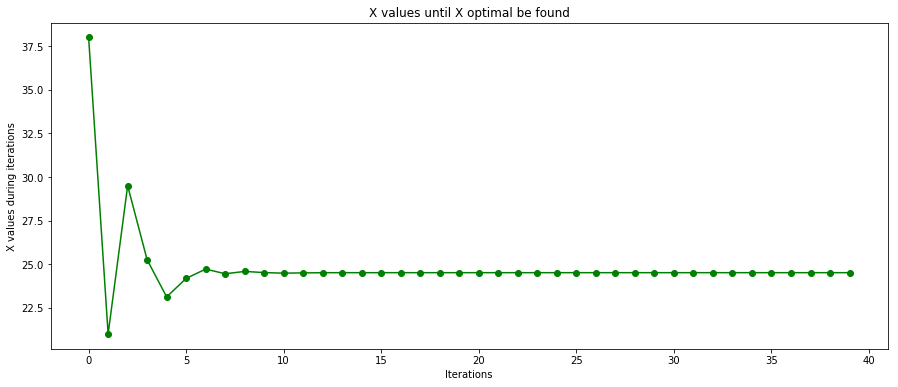

In [7]:
# limits in which we'll analyse the function
upperLimit = 72.0
lowerLimit = 4.0

#defining tolerance and max number o iterations
tolerance = 0.0000000001
max_iteration = 100
iteration = 0

#initial point
x0  = 38
x1 = np.zeros(max_iteration)

# our function that was defined above:
def f(x):
    return ro[0]*x**6+ ro[1]*x**5 + ro[2]*x**4 + ro[3]*x**3 + ro[4]*x**2 + ro[5]*x**1 + ro[6]*x**0

#finding the direnction in which the function will go
def deltaf(x):
    return 6*ro[0]*np.power(x,5)+ 5*ro[1]*np.power(x,4) + 4*ro[2]*np.power(x,3) + 3*ro[3]*np.power(x,2) + 2*ro[4]*np.power(x,1) + ro[5]
d = -deltaf(x0)

# g = ro[0]*(x0 + a*d)**2 + ro[1]*(x0+ a*d)**1+ ro[2]*(x+a*d)**0
#def deltag(a):
#    return ro[0]*2*d*x0 + ro[0]*2*d*a*d + ro[1]*d

#defining the size of gamma
gamma = (upperLimit + lowerLimit)/2

#Implementing the method
while((iteration <= max_iteration) and (upperLimit - lowerLimit > tolerance)):    
    #analysisng the g function on alpha 
    #print('iteration: ' + str(iteration) + ' gamma: ' + str(gamma) + " deltag: " +str(deltag(gamma)) + ' a: ' + str(a) + ' b: ' + str(b) + ' d ' + str(d))
    if(deltaf(gamma) == 0): # minimum of the function was found
        break
    elif(deltaf(gamma) < 0): # minimum of the function is between [gamma,a]
        d = -deltaf(gamma)
        x1[iteration] = gamma        
        lowerLimit = gamma
        gamma = (upperLimit + lowerLimit)/2
    elif(deltaf(gamma) > 0): # minimum of the function is between [b,gamma]
        d = -deltaf(gamma)
        x1[iteration] = gamma        
        upperLimit = gamma
        gamma = (upperLimit + lowerLimit)/2
    iteration = iteration + 1

print('**************Gradient Method********************\n')
#print('\t coefficients ro: ')
#print(ro)
print('Current Function Value: ' + str(f(gamma)) + '\n Iterations: ' + str(iteration) +'\n minimum: ' + str(gamma) + '\n')

#comparing the result with python implemetation of the Nelder-Mead simplex algorithm
# it works with functions of lower order(less complex)
#print('*************Scipy Implementation(Nelder-Mead simplex algorithm)*******************\n\n')
#min = minimize(f,x0=0,method='nelder-mead',options={'xtol': 1e-11, 'disp': True})
#print('\t minimum: ' + str(min.x))

#ploting x's variance until we reach the minimum value of it
plt.figure(figsize=(15,6))
plt.plot(np.arange(iteration), x1[:iteration],'go-')
plt.ylabel('X values during iterations')
plt.xlabel('Iterations')
plt.title("X values until X optimal be found")
plt.show()

# <center>Newton Method

<center>$\mathbf{x_{k+1} = x_{k} - H^{-1}\triangledown J(x_{k})}$<br>
<left> Since we are optmizing an 1 dimension equation the formula above can be simplified as shown below:
<center> $\mathbf{x_{k+1} = x_{k} - \frac{f'(x_{k})}{f''(x_{k})}}$

Minimum: 24.5147844828
Iterations: 5


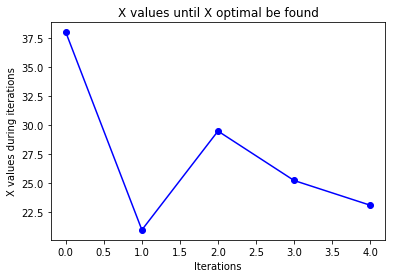

In [12]:
#defining tolerance and max number o iterations
tolerance = 0.00000000001
max_iteration_Newton = 10
iteration = 0

#initial point
x0_Newton  = 20 
x1_Newton = np.zeros(max_iteration)
x1_Newton[0] = x0_Newton


#second derivative of f(x) -> f''(x)
def delta2f(x):
    return 30*ro[0]*np.power(x,4)+20*ro[1]*np.power(x,3)+12*ro[2]*np.power(x,2)+6*ro[3]*np.power(x,1)+2*ro[4]

d = deltaf(x0_Newton)/delta2f(x0_Newton)

while((iteration < max_iteration - 1) and (abs(d) > tolerance) ):
    x1_Newton[iteration+1] = x1_Newton[iteration] - d 
    d = deltaf(x1_Newton[iteration+1])/delta2f(x1_Newton[iteration+1])
    iteration = iteration + 1

print('Minimum: ' + str(x1_Newton[iteration]))
print('Iterations: ' + str(iteration))
plt.plot(np.arange(iteration), x1[:iteration],'bo-')
plt.ylabel('X values during iterations')
plt.xlabel('Iterations')
plt.title("X values until X optimal be found")
plt.show()

# <center>Bibliographic References

 - 11 bases de dados gratuitas para mineração, estudos e testes. Big Data Business. Disponível em: <http://www.bigdatabusiness.com.br/6-bases-de-dados-gratuitas-para-mineracao-estudos-e-testes/>. Acesso em: 24  abr.  2018.;
 - Ipeadata. Ipeadata.gov.br. Disponível em: <http://www.ipeadata.gov.br/Default.aspx>. Acesso em: 24  abr.  2018.;

In [ ]:
#this cell will be replaced with the real data. I'm only using it to test the code
# creates the coefficients of the n-th order
sample = 50
theta1 = 1
theta2 = 2
theta3 = 8
theta4 = 20
theta5 = 6
theta6 = 1
#creates the function itself
def Input_data(x):
    z = theta1*np.power(x,2) + theta2*np.power(x,1) - theta3*np.power(x,0) - theta4*np.sin(x) + np.random.normal(0,1, 1)
    return z
# this is the simulation data that will replace by the real data 
x = np.arange(-25,sample-26)